In [1]:
#a. Import the necessary packages


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#b. Load the training and testing data (MNIST/CIFAR10)

train_data_dir = 'cifar-10-img/train'
test_data_dir = 'cifar-10-img/test'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 20000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=train_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=test_batch_size,
    class_mode='sparse', 
    shuffle=True,
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [ ]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [ ]:

y_train = y_train.flatten()
y_test = y_test.flatten()

In [9]:

#c. Define the network architecture using Keras



# number of classes
K = len(set(y_train))
# calculate total number of classes 
# for output layer
print("number of classes:", K)
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)

number of classes: 10


In [10]:
#D.Train the model using SGD
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 196ms/step - accuracy: 0.4036 - loss: 1.7624 - val_accuracy: 0.5100 - val_loss: 1.3787
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 190ms/step - accuracy: 0.5481 - loss: 1.2596 - val_accuracy: 0.6010 - val_loss: 1.1262
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 186ms/step - accuracy: 0.6266 - loss: 1.0609 - val_accuracy: 0.6030 - val_loss: 1.1251
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 186ms/step - accuracy: 0.6763 - loss: 0.9213 - val_accuracy: 0.6700 - val_loss: 0.9745
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 198ms/step - accuracy: 0.7124 - loss: 0.8110 - val_accuracy: 0.6860 - val_loss: 0.9308
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 218ms/step - accuracy: 0.7477 - loss: 0.7199 - val_accuracy: 0.6900 - val_loss: 0.9253
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 195ms/step - accuracy: 0.7753 - loss: 0.6382 - val_accuracy: 0.6960 - val_loss: 0.8884
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.8008 -

In [11]:
#e. Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7260 - loss: 0.8746 
Loss:  0.8745718002319336
Accuracy:  0.7260000109672546


In [12]:

import matplotlib.pyplot as plt
y = to_categorical(y_test)
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step  


In [13]:
labels = list(test_generator.class_indices.keys())

Actual Number:  automobile
Predicted Number:  automobile


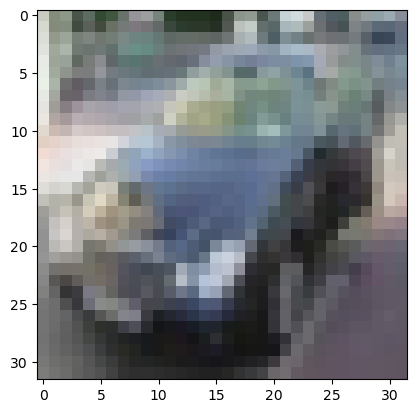

In [14]:

n = 10
plt.imshow(x_test[n])
print("Actual Number: ",labels[np.argmax(y[n])])
print("Predicted Number: ", labels[np.argmax(predicted_value[n])])

In [ ]:
#f. Plot the training loss and accuracy

history = history.history
history.keys()